# 1. Install and Import dependencies

## 1.1 Install dependencies
(Python version used: 3.10.2)

In [2]:
!pip3.8 install tensorflow tensorflow-io matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Obtaining dependency information for tensorflow-io from https://files.pythonhosted.org/packages/b8/72/ebd9edc5cee97a4dd438cd20bf2296c0a29e4a4beb638a7495b62fb7fcae/tensorflow_io-0.34.0-cp38-cp38-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-io-gcs-filesystem==0.34.0 from https://files.pythonhosted.org/packages/3b/8f/916ccfc458600251e7b86f878d8d28515e8b3b62837f9c44c135262dc876/tensorflow_io_gcs_filesystem-0.34.0-cp38-cp38-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  DEPRECATION: Configuring installation scheme with di

In [12]:
!pip3.8 install tensorflow-io==0.34.0

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


## 1.2 Load dependencies

In [8]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

# 2. Build Data Loading Function

## 2.1 Define Paths to files

In [4]:
path_of_data = os.path.expanduser('~/data/')
YAKETY_SAX_FILE = os.path.join(path_of_data, 'IRMAS-Sample', 'Testing', '14.  Boots Randolph - Yakety Sax-1.wav')


## 2.2 Build Dataloading Function

In [13]:
def load_wav_16k_mono(filename):
    # load encoded wav file
    file_contents = tf.io.read_file(filename)
    # decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000Hz. When you lower the sample rate, 
    # the number of samples taken per second decreases. This reduces the 
    # amount of data and detail in the recording, and consequently, the 
    # maximum frequency that can be accurately captured also decreases.
    
    #wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [15]:
# For example, the shape=(882000,) means there are 882000 sample points for the amplitude of the wave form.
# and duration of the sound is 882000/44100 = 20 seconds, in the below example. 
load_wav_16k_mono(YAKETY_SAX_FILE)

<tf.Tensor: shape=(882000,), dtype=float32, numpy=
array([ 0.10754395,  0.1302185 ,  0.11608887, ..., -0.27331543,
       -0.26818848, -0.26638794], dtype=float32)>

## 2.3 Plot Wave

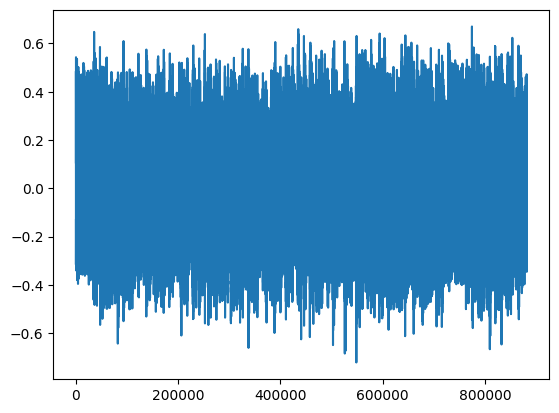

In [16]:
wave = load_wav_16k_mono(YAKETY_SAX_FILE)
plt.plot(wave)
plt.show()

# 3. Create Tensorflow Dataset

## 3.1 Define paths to training data and represent them in dataframe. 

In [44]:
training_folder_path = os.path.join(path_of_data, 'IRMAS-TrainingData')
labels = list(set([name for name in os.listdir(training_folder_path)]) - set(['README.txt']))
assignments = {}
for label in labels:
    label_dir = os.path.join(training_folder_path, label)
    files_of_label = [file_name for file_name in os.listdir(label_dir)]
    assignments[label] = files_of_label

In [49]:
data = [(id, col) for col, ids in assignments.items() for id in ids]
df = pd.DataFrame(data, columns=['id', 'column'])
df_pivot = df.pivot(index='id', columns='column', values='column')
df_pivot = df.pivot(index='id', columns='column', values='column')
df_pivot = df_pivot.notnull().astype(int)
df_pivot = df_pivot.reset_index()

In [51]:
df = df_pivot